In [1248]:
import torch
import matplotlib.pyplot as plt

import torchvision
from torchvision import datasets,transforms

In [1249]:
train_data = datasets.FashionMNIST(
    root="data/fashion-mnist",download=True,train=True,transform=transforms.ToTensor()
    )

test_data = datasets.FashionMNIST(
    root="data/fashion-mnist",
    download=True,
    train=False,
    transform=transforms.ToTensor(),
)

In [1250]:
len(train_data), len(test_data)

(60000, 10000)

In [1251]:
img,label = train_data[0]
label,img

(9,
 tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.00

In [1252]:
classes_name = train_data.classes,
classes_name = classes_name[0]
len(train_data.classes), classes_name

(10,
 ['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'])

In [1253]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [1254]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [1255]:
img,label  = train_data[0]
print(f"image shape: {img.shape},\nlabel: {classes_name[label]}")

image shape: torch.Size([1, 28, 28]),
label: Ankle boot


Image shape: torch.Size([1, 28, 28])


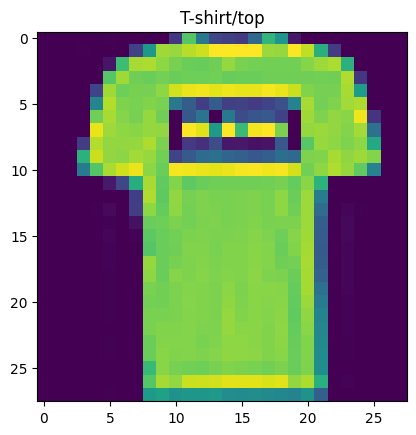

In [1256]:
img,label = train_data[1]
plt.title(classes_name[label])
print(f"Image shape: {img.shape}")
plt.imshow(img.squeeze())

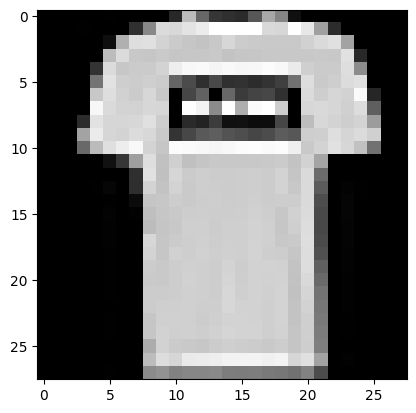

In [1257]:
plt.imshow(img.squeeze(),cmap="gray")

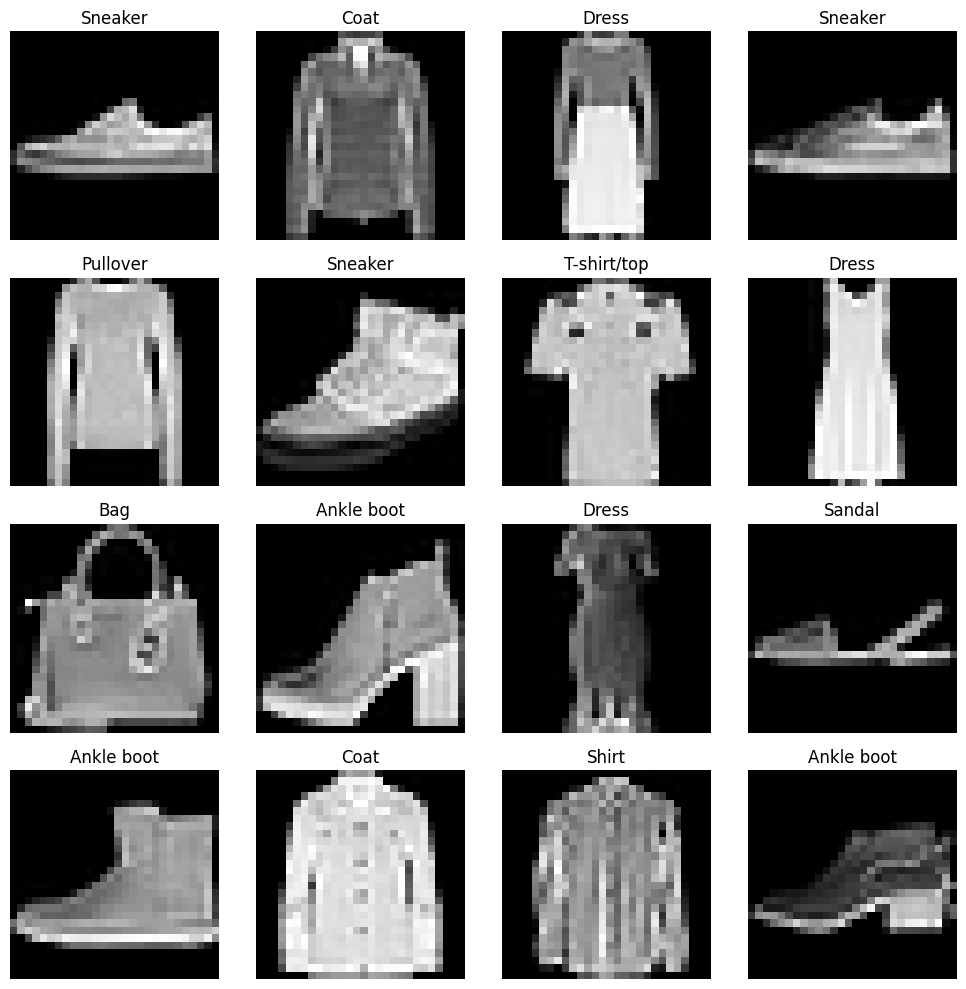

In [1258]:
# torch.manual_seed(42)

fig = plt.figure(figsize=(10,10))

n_rows = 4
n_cols = 4

for i in range(1,n_rows * n_cols + 1):
    random_idx = torch.randint(low=0,high=len(train_data),size=(1,)).item()
    img,label = train_data[random_idx]
    fig.add_subplot(n_rows,n_cols,i)
    plt.title(classes_name[label])
    plt.imshow(img.squeeze(),cmap="gray")
    plt.axis(False)

plt.tight_layout()

In [1259]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data/fashion-mnist
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data/fashion-mnist
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [1291]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False)

print(f"Train data loader length: {len(train_dataloader)}, batch size {train_dataloader.batch_size}"),
print(
    f"Test data loader length: {len(test_dataloader)}, batch size {test_dataloader.batch_size}"
),

Train data loader length: 1875, batch size 32
Test data loader length: 313, batch size 32


(None,)

In [1261]:
len(train_dataloader.dataset)

60000

In [1262]:
train_features_batch ,train_label_batch = next(iter(train_dataloader))
train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

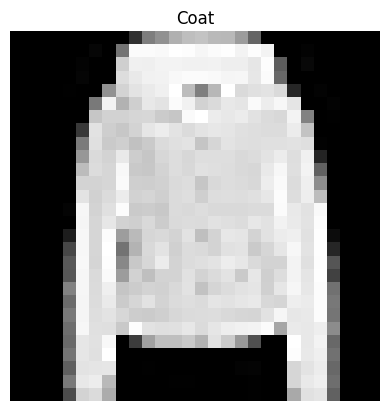

In [1263]:
random_idx = torch.randint(0,len(train_features_batch),size=(1,)).item()
img,label = train_features_batch[random_idx],train_label_batch[random_idx]

plt.title(classes_name[label])
plt.imshow(img.squeeze(),cmap="gray")
plt.axis(False)

In [1264]:
from torch import nn
flatten_model = nn.Flatten()

x = train_features_batch[0]
flatten_image = flatten_model(x)


print(f"{x.shape}")
flatten_image.shape

torch.Size([1, 28, 28])


torch.Size([1, 784])

In [1265]:
len(train_dataloader)

1875

In [1266]:
from typing import Union,List

class FashionMNISTModelV0(nn.Module):
    def __init__(self,input_shape:int,hidden_units:Union[int,List[int]],output_shape:int) -> None:
        super().__init__()
        self.layers_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )

    def forward(self,x:torch.Tensor):
        return self.layers_stack(x)

In [1267]:
torch.manual_seed(42)
model_v0 = FashionMNISTModelV0(input_shape=28*28,hidden_units=10,output_shape=len(classes_name))
model_v0

FashionMNISTModelV0(
  (layers_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [1268]:
import sys
from pathlib import Path

sys.path.append(str(Path("helper_functions.py").resolve().parent.parent))

from helper_functions import plot_decision_boundary

In [1269]:
dummy_x = torch.rand(size=(1,1,28,28))

y_pred = model_v0(dummy_x)
y_pred.shape

torch.Size([1, 10])

In [1270]:
model_v0.state_dict()

OrderedDict([('layers_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layers_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layers_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, 

In [1271]:
from torchmetrics import Accuracy

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_v0.parameters(),lr=0.1)
accuracy_fn= Accuracy(task="multiclass", num_classes=len(classes_name))

In [1272]:
def print_train_time(start:float,end:float,device:torch.device = None):
    total_time = end - start
    print(f"Total time on {device} is: {total_time:.3f} in seconds")

In [1273]:
from timeit import default_timer as timer

start = timer()

end = timer()
print_train_time(start,end,device="cpu")

Total time on cpu is: 0.000 in seconds


In [1274]:
from tqdm.auto import tqdm

start = timer()

torch.manual_seed(42)

epochs = 3
model_v0.to("cpu")

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----")

    train_loss = 0
    for batch,(X,y) in enumerate(train_dataloader):
        model_v0.train()
        y_logits = model_v0(X)
        y_preds = torch.argmax(y_logits,dim=1)

        loss = loss_fn(y_logits, y)
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at batch {batch * len(X)} / { len(train_dataloader.dataset)} samples")
            train_acc = accuracy_fn(y_preds.cpu(), y.cpu())
    train_loss /= len(train_dataloader)

    model_v0.eval()
    test_loss = 0
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            y_logits = model_v0(X_test)
            y_preds = torch.argmax(y_logits,dim=1)

            loss = loss_fn(y_logits, y_test)
            test_loss += loss

            test_acc = accuracy_fn(y_preds, y_test)

        test_loss /= len(test_dataloader)

    print(f"Train loss: {train_loss.item()} | Train Acc: {train_acc}")
    print(f"Test loss: {test_loss} | Test Acc: {test_acc}")
end = timer()

print_train_time(start,end,device="cpu")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked at batch 0 / 60000 samples
Looked at batch 12800 / 60000 samples
Looked at batch 25600 / 60000 samples
Looked at batch 38400 / 60000 samples
Looked at batch 51200 / 60000 samples


 33%|███▎      | 1/3 [00:06<00:12,  6.30s/it]

Train loss: 0.5903892517089844 | Train Acc: 0.9375
Test loss: 0.5095350742340088 | Test Acc: 0.875
Epoch: 1
----
Looked at batch 0 / 60000 samples
Looked at batch 12800 / 60000 samples
Looked at batch 25600 / 60000 samples
Looked at batch 38400 / 60000 samples
Looked at batch 51200 / 60000 samples


 67%|██████▋   | 2/3 [00:12<00:06,  6.02s/it]

Train loss: 0.4763319790363312 | Train Acc: 0.90625
Test loss: 0.47989004850387573 | Test Acc: 0.9375
Epoch: 2
----
Looked at batch 0 / 60000 samples
Looked at batch 12800 / 60000 samples
Looked at batch 25600 / 60000 samples
Looked at batch 38400 / 60000 samples
Looked at batch 51200 / 60000 samples


100%|██████████| 3/3 [00:18<00:00,  6.00s/it]

Train loss: 0.4550333023071289 | Train Acc: 0.875
Test loss: 0.47663894295692444 | Test Acc: 0.9375
Total time on cpu is: 18.012 in seconds


In [1246]:
model_v0.to("cuda")

FashionMNISTModelV0(
  (layers_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [1247]:
from tqdm.auto import tqdm

start = timer()

# torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 3


for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----")

    train_loss = 0

    for batch,(X,y) in enumerate(train_dataloader):
        model_v0.train()
        X = X.to("cuda")
        y = y.to("cuda")

        y_logits = model_v0(X)
        y_preds = torch.argmax(y_logits, dim=1)
        loss = loss_fn(y_logits, y)

        train_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at batch: {batch * len(X)} / {len(train_dataloader.dataset)}")
            acc = accuracy_fn(y_preds.to("cpu"), y.to("cpu"))
            print(f"Acc: {acc}")
    train_loss /= len(train_dataloader)
    print(f"Train loss: {train_loss}")

end = timer()

print_train_time(start,end,"cuda")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked at batch: 0 / 60000
Acc: 0.84375
Looked at batch: 12800 / 60000
Acc: 0.8125
Looked at batch: 25600 / 60000
Acc: 0.84375
Looked at batch: 38400 / 60000
Acc: 0.875
Looked at batch: 51200 / 60000
Acc: 0.78125


 33%|███▎      | 1/3 [00:06<00:12,  6.32s/it]

Train loss: 0.4425109028816223
Epoch: 1
----
Looked at batch: 0 / 60000
Acc: 0.78125
Looked at batch: 12800 / 60000
Acc: 0.8125
Looked at batch: 25600 / 60000
Acc: 0.875
Looked at batch: 38400 / 60000
Acc: 0.65625
Looked at batch: 51200 / 60000
Acc: 0.875


 67%|██████▋   | 2/3 [00:12<00:06,  6.41s/it]

Train loss: 0.43649178743362427
Epoch: 2
----
Looked at batch: 0 / 60000
Acc: 0.875
Looked at batch: 12800 / 60000
Acc: 0.90625
Looked at batch: 25600 / 60000
Acc: 0.96875
Looked at batch: 38400 / 60000
Acc: 0.84375
Looked at batch: 51200 / 60000
Acc: 0.6875


100%|██████████| 3/3 [00:19<00:00,  6.43s/it]

Train loss: 0.43076905608177185
Total time on cuda is: 19.278 in seconds


In [1289]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,acc_fn):
    loss = 0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            y_logits = model(X)
            y_preds = torch.argmax(y_logits,dim=1)

            loss += loss_fn(y_logits,y)
            acc = acc_fn(y_preds,y)
        loss /= len(data_loader)

    return {"model_name": model.__class__.__name__, "model_loss": round(loss.item(),4),"model_acc":acc}

In [1290]:
model_v0_results = eval_model(model_v0,test_dataloader,loss_fn,accuracy_fn)
model_v0_results

100%|██████████| 313/313 [00:00<00:00, 416.27it/s]


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766,
 'model_acc': tensor(0.9375)}